In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from itertools import groupby
from pylab import cm,matplotlib
from matplotlib.colors import ListedColormap

In [2]:
path_to_file = 'Salts_Lollipop.xlsx'
df=pd.read_excel(path_to_file,sheet_name='Lollipop',header=0,engine='openpyxl')
df.sort_values(by='Case')
df1 = df
df1 = df.sort_index(axis=0,ascending=False)
df1 = df.groupby(['Salt']).sum()

N_salts=len(df['Salt'].value_counts())

In [ ]:
df['Salt'][1]

In [34]:
# Definition of required parameters and tools

my_range = list(range(1,len(df.index)+1))

# Font size
fs_t = 10
fs_x = 14

axes, xlim1, xlim2, var1, var2 = ([0,1,2,3,4],[50.0,0.0,0.0,0.0,0.0],
                                         [200,60,180,80,2.5],
                                   ['LCOE','CF','Par','F_pipe','F_tank'],
                                   ['LCOE[$/MWh]','$CF$',r'$E_{par}$ $(GWh)$',r'$E_{par,pipe}$ $(GWh)$',r'$E_{par,tank}$ $(GWh)$'])

In [5]:
my_range

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [6]:
# For colors

viridisBig = cm.get_cmap('viridis', 512)
cmap = ListedColormap(viridisBig(np.linspace(0.0, 0.9, N_salts)))
c_v=[]
for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    c_v.append(matplotlib.colors.rgb2hex(rgba))
    

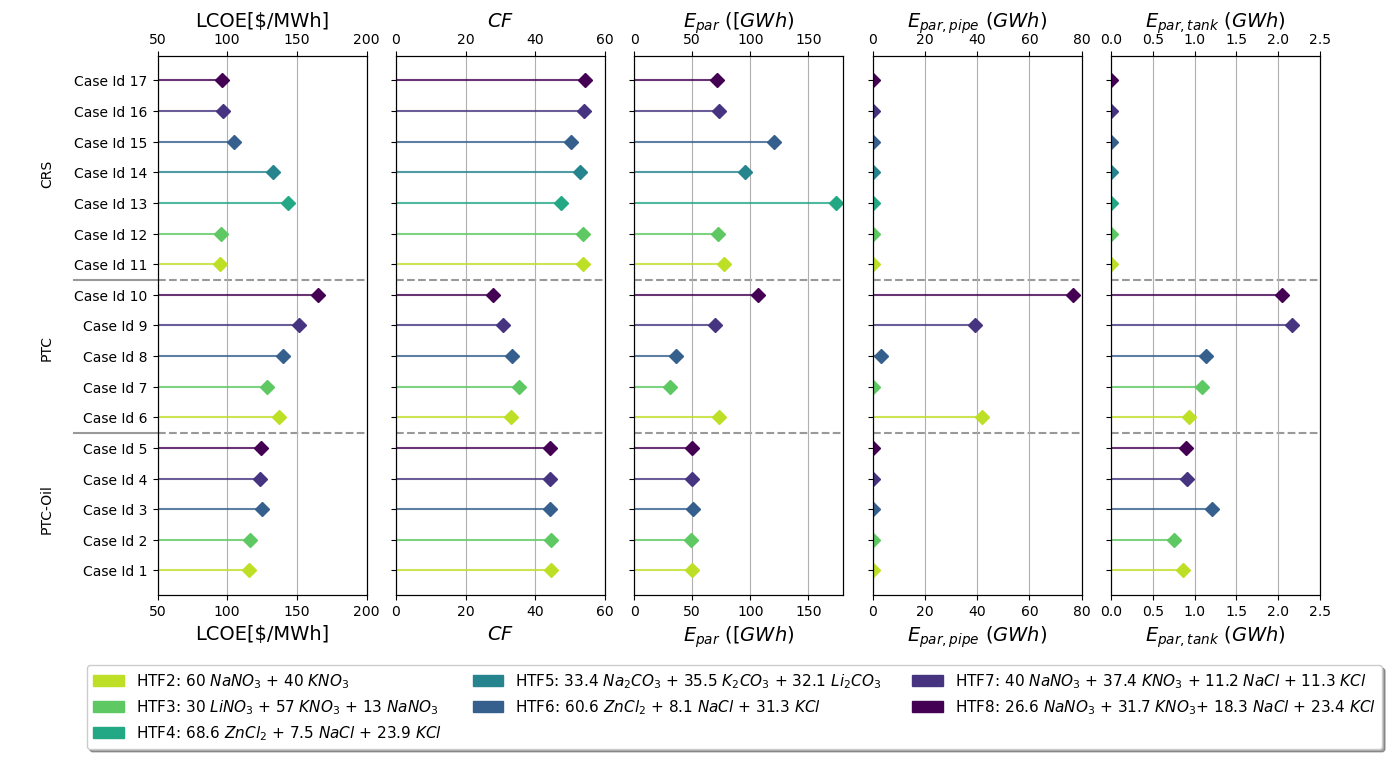

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(15,7))
plt.subplots_adjust(wspace=0.14)

for i in axes:
    plt.axes(ax[i])
    ax[i].set_xlim(xlim1[i],xlim2[i])
    j=0
    for n in reversed(my_range):
        if df['Salt'][j] == 'HTF2':
            c = c_v[6]
        elif df['Salt'][j] == 'HTF3':
            c = c_v[5]
        elif df['Salt'][j] == 'HTF4':
            c = c_v[4]
        elif df['Salt'][j] == 'HTF5':
            c = c_v[3]
        elif df['Salt'][j] == 'HTF6':
            c = c_v[2]
        elif df['Salt'][j] == 'HTF7':
            c = c_v[1]
        elif df['Salt'][j] == 'HTF8':
            c = c_v[0] 
                  
                # These two lines are for lollipop
        plt.hlines(y=my_range[j], xmin=0, xmax=df[var1[i]][j], color=c, alpha=0.8)
        plt.plot(df[var1[i]][j], my_range[j], "D", ms=N_salts ,color=c)
        #
        
        j+=1
        
    plt.xlabel(var2[i], fontsize=fs_x)
    plt.grid(axis='x')
    plt.xticks(fontsize=fs_t)
    ax0 = ax[i].twiny()
    ax0.set_xlim(ax[i].get_xlim())
    plt.xlabel(var2[i], fontsize=fs_x)
    plt.xticks(fontsize=fs_t)

h = 5.5
delta = 5
ax[0].axhline(xmin=-0.4,xmax=0,y=h,c="gray",alpha=0.8,ls='-',zorder=0, clip_on=False)
ax[0].axhline(xmin=-0.4,xmax=0,y=h+delta,c="gray",alpha=0.8,ls='-',zorder=0, clip_on=False)
for i in axes:
    ax[i].axhline(xmin=0,xmax=1,y=h,c="gray",alpha=0.8,ls='--',zorder=0, clip_on=False)
    ax[i].axhline(xmin=0,xmax=1,y=h+delta,c="gray",alpha=0.8,ls='--',zorder=0, clip_on=False)

ax[0].annotate('CRS',
            xy=(40, 600),
            xycoords='figure pixels',
            horizontalalignment='left',
            verticalalignment='top',
            rotation=90)
ax[0].annotate('PTC',
            xy=(40, 425),
            xycoords='figure pixels',
            horizontalalignment='left',
            verticalalignment='top',
            rotation=90)
ax[0].annotate('PTC-Oil',
            xy=(40, 275),
            xycoords='figure pixels',
            horizontalalignment='left',
            verticalalignment='top',
            rotation=90)

plt.yticks(my_range, df['Case'])

#plt.yticks(my_range, '')

# Molten salt legends
S1_p = mpatches.Patch(color=c_v[6],label='HTF2: 60 $NaNO_3$ + 40 $KNO_3$')
S2_p = mpatches.Patch(color=c_v[5],label='HTF3: 30 $LiNO_3$ + 57 $KNO_3$ + 13 $NaNO_3$')
S3_p = mpatches.Patch(color=c_v[4],label='HTF4: 68.6 $ZnCl_2$ + 7.5 $NaCl$ + 23.9 $KCl$')
S4_p = mpatches.Patch(color=c_v[3],label='HTF5: 33.4 $Na_2CO_3$ + 35.5 $K_2CO_3$ + 32.1 $Li_2CO_3$')
S5_p = mpatches.Patch(color=c_v[2],label='HTF6: 60.6 $ZnCl_2$ + 8.1 $NaCl$ + 31.3 $KCl$')
S6_p = mpatches.Patch(color=c_v[1],label='HTF7: 40 $NaNO_3$ + 37.4 $KNO_3$ + 11.2 $NaCl$ + 11.3 $KCl$')
S7_p = mpatches.Patch(color=c_v[0],label='HTF8: 26.6 $NaNO_3$ + 31.7 $KNO_3$+ 18.3 $NaCl$ + 23.4 $KCl$')
plt.legend(handles=[S1_p,S2_p,S3_p,S4_p,S5_p,S6_p,S7_p], loc='lower center', 
           bbox_to_anchor=(-1.8, -0.3), fancybox=True, shadow=True, ncol=3, prop={'size': 11})

plt.show()

In [ ]:
c_v